<center><font size="+4">Programming & Data Analytics & AI 2 2022/2023</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer (informally)</font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Assignments for</font></center>
<center><font size="+4">Part 2.2: Unsupervised learning</font><br/></center>

---


**Welcome to your second programming assignment for PDAI2**
- It is about about Dimensionality Reduction and Clustering

# Digits dataset 

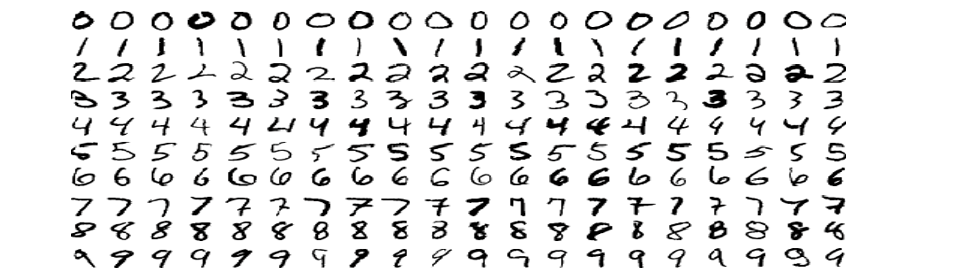






 - This dataset is made up of 1797 images. 
 - Each image
    - Depicts a hand-written digit (from 0 to 9). 
    - Is an 8x8 image in grey-scale. I.e., it comes as an 8x8 matrix where each position is a pixel. 
      - The value of  pixel (i,j) gives the darkness/brightness/color of point (i,j)

We need to make this dataset tabular
- Each image is a row of a CSV
- We get 64 features: each point (i,j) becomes a feature.
- Therefore, our dataset consists of 
   - 1797 samples (rows) 
   - 64 features (columns)


In [16]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)
digits_X=digits.data
digits_X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


# The assignment(s)

We want to cluster these images in 10 classes, one per digit.
- All zeros
- All ones
- ...
- All nines

__Assignments__
1. visualize the dataset using PCA and TSNE.
2. use *k*-means to try to identify similar digits *without using the original label information*;
   - This is unsupervised learning: __you must ignore the label__

## Helper Functions

Run the following cell to use the helper functions in your assignments:
 list of (x, y) coordinates
 - `plot_2dscatter(x,y,label)`: 
     - shows a 2D scatter plot using as coordinates `x,y`.  
     - the data points will be colored according to the `label`
 - `show_images(data)`:  
     - shows 10 8x8 pixel images of digits contained in `data`. The shape is `data` (10, 8, 8),

In [2]:
# 2d scatter plot 
def plot_2dscatter(x,y,label):
    """
    A scatter plot of y vs. x with annotations and varying color according to label.
    Parameters:
        x, y float or array-like, shape (n, ),
            The data positions.
        label, string array-like:
            labels of data points
    """
    plt.figure(figsize=(20,10))
    cmap=plt.cm.get_cmap('jet', 10)
    plt.scatter(x, y, c=label, cmap=cmap, s=1)
    # Add labels to points in scatter plots
    for i in range(len(x)):
        plt.text(x[i],y[i], label[i],
              color=cmap(label[i]),fontdict={'weight': 'bold', 'size': 11})
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)

# images viewer
def show_images(data):
    """ shows  10 8x8 pixel images contained in data 
    Parameters:
    data array-like, shape (10, 8, 8),
        10 8×8 pixel images
    """
    fig, ax = plt.subplots(2, 5, figsize=(8, 3))

    for axi, center in zip(ax.flat, data):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Load dataset

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style('white');  # for plot styling
import numpy as np
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

# load data
digits = load_digits(as_frame=True)

df_X = digits.data   # feature matrix
df_y = digits.target # target vector

print('X shape', df_X.shape)   
df_X.head()           # pixel_i_j is the pixel in the ith row and jth column of the 8 x 8 image

X shape (1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
# 64 features is the brightness of one pixel in an 8×8 image:
df_X.values[1].reshape(8,8) 

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

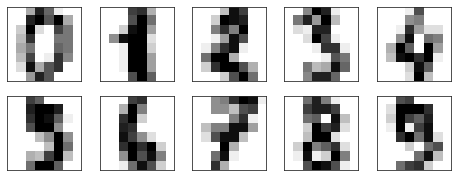

In [14]:
# shows the first 10 8x8 pixel images of digits contained in df_X
show_images( df_X.values[0:10].reshape(10,8,8))

# Assignment 1: Multidimensional Visualization
Let's start with the application of dimensionality reduction (using PCA and t-SNE) in oder 
visualize the high-dimensional dataset

## 1.1 Multidimensional Visualization using PCA
Reduce the dataset in 2 dimensions using PCA and plot the result using the `plot_2dscatter` function

*Note: Principal Component Analysis is great at retaining global structure, because it looks at ways in which a dataset's variance is retained, globally, across the entire dataset.*

In [ ]:
from sklearn.decomposition import PCA # Principal Component Analysis module
## TO BE COMPLETED ##

# create an instance of the class PCA for 2-D

# computes PCA components and trasforms original data

# plot the result using the plot_2dscatter function
    


##  Multidimensional Visualization using TSNE
Reduce the dataset in 2 dimensions using TSNE and plot the result using the `plot_2dscatter` function

*Note: t-SNE works differently by looking at data points that appear locally. It reduces dimensionality so that points the neighbors in the original n-dimensional space, are also found to be neighbors in the reduced dimensional space.*
 

In [ ]:
from sklearn.manifold import TSNE
## TO BE COMPLETED ##
# set TSNE for 2-D

# computes TSNE reduced dimensional space and trasforms original data

# plot the result using the plot_2dscatter function



What are the most similar groups that can be easily confused?

# Assignment 2: K-means on digits
Use k-means to try to identify similar digits without using the original label information;
this might be similar to a first step in extracting meaning from a new dataset on which we have no a priori label information.

Follow these steps:
- perform Kmeans with K=10
- display centroids images
- display data from the k-means cluster analysis as a 2D scatterplot



In [ ]:
from sklearn.cluster import KMeans
## TO BE COMPLETED ##

# performs Kmeans with K=10

# print shape of centroids



Can KMeans find clusters whose centers are recognizable digits?

In [ ]:
# plot centroids images using  show_images  (maybe you have to reshape data)
## TO BE COMPLETED ##



If you didn't have the target variable information would you have been able to identify groups with similar digits using k-means?

In [ ]:
# display data points from the k-means cluster analysis using 2D TSNE Scatter Plot 
## TO BE COMPLETED ##


